# Web automation

## Beautiful Soup


https://realpython.com/beautiful-soup-web-scraper-python/

![fake_webpage](fake_webpage.png)

In [1]:
import requests as rq

URL = "https://realpython.github.io/fake-jobs/"
page = rq.get(URL)

# print(page.text)

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, "html.parser")

In [5]:
res = soup.find("img")
res

<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>

In [6]:
r = rq.get(res['src'])
open(res['alt']+".jpg","wb").write(r.content)

4821

In [7]:
# # Open image outside of the notebook
# from PIL import Image
# with Image.open(res['alt']+".jpg") as im:
#     im.show()

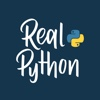

In [8]:
from IPython.display import Image 
img = Image(filename=res['alt']+".jpg")
display(img)

In [15]:
res = soup.find_all(class_ = "card-footer-item")
# len(res) # 200
res2 = [r for r in res[1::2]] # every other element of the list (starting at the second element)
len(res2)

100

In [19]:
res2[0]

<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>

In [20]:
res2[0]['href'].split("/")[-1]

'senior-python-developer-0.html'

In [34]:
URL = res2[0]['href']
filename = res2[0]['href'].split("/")[-1].replace(".html",".txt")
page = rq.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
h1 = soup.find("h1").text
h2 = soup.find("h2").text
c = soup.find(class_ = "content").text
f = open("jobs/"+filename,"w")
f.write(h1)
f.write(h2)
f.write(c)
f.close()

In [32]:
" ".join([h1,h2,c])

'\n        Fake Python\n       Payne, Roberts and Davis \nProfessional asset web application environmentally friendly detail-oriented asset. Coordinate educational dashboard agile employ growth opportunity. Company programs CSS explore role. Html educational grit web application. Oversea SCRUM talented support. Web Application fast-growing communities inclusive programs job CSS. Css discussions growth opportunity explore open-minded oversee. Css Python environmentally friendly collaborate inclusive role. Django no experience oversee dashboard environmentally friendly willing to learn programs. Programs open-minded programs asset.\nLocation: Stewartbury, AA\nPosted: 2021-04-08\n'

In [ ]:
for r in res2:
    URL = r['href']
    filename = r['href'].split("/")[-1].replace(".html",".txt")
    page = rq.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    h1 = soup.find("h1").text
    h2 = soup.find("h2").text
    c = soup.find(class_ = "content").text
    f = open("jobs/"+filename,"w")
    f.write(h1)
    f.write(h2)
    f.write(c)
    f.close()

In [1]:
import requests as rq
from bs4 import BeautifulSoup

URL = 'https://realpython.github.io/fake-jobs/'
page = rq.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
res = soup.find_all(class_ = "location")

In [7]:
open("location1.txt","w").write(res[0].text)

31

## Selenium

### Installation

| Browser | Webdriver |
|---------|-----------------------------------------------|
| Chrome: |	https://sites.google.com/chromium.org/driver/ |
| Edge: |	https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/ |
| Firefox: |	https://github.com/mozilla/geckodriver/releases |

### Simple usage
https://selenium-python.readthedocs.io/getting-started.html#simple-usage

### Locating elements
https://selenium-python.readthedocs.io/locating-elements.html

Example usage:
```python
from selenium.webdriver.common.by import By

driver.find_element(By.XPATH, '//button[text()="Some text"]')
driver.find_elements(By.XPATH, '//button')
```

These are the attributes available for By class:
```python
ID = "id"
XPATH = "xpath"
LINK_TEXT = "link text"
PARTIAL_LINK_TEXT = "partial link text"
NAME = "name"
TAG_NAME = "tag name"
CLASS_NAME = "class name"
CSS_SELECTOR = "css selector"
```

### Manual extract

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
driver = webdriver.Chrome()

In [2]:
url = "https://realpython.github.io/fake-jobs/"

In [3]:
driver.get(url)

In [4]:
title = driver.find_element(by=By.CLASS_NAME, value="title")
title.text

'Fake Python'

In [5]:
res = driver.find_elements(by=By.TAG_NAME, value="img")
src = res[0].get_property('src')
src

'https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1'

In [6]:
from IPython.display import Image 
Image(url=src)

In [7]:
item = driver.find_elements(by=By.CLASS_NAME, value="card-footer-item")
# len(res)
apply = [r for r in item[1::2]] # every other element of the list (starting at the second element)
len(apply)

100

In [8]:
href = apply[0].get_attribute('href')
href

'https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html'

In [9]:
apply[0]

<selenium.webdriver.remote.webelement.WebElement (session="15aad410e7cca28d0c80c1c9f98757a9", element="d53a45fc-4d0d-42cf-aa23-4ff0364fdffa")>

In [10]:
# apply[0].click()
driver.get(href)

In [11]:
ResultsContainer = driver.find_element(By.ID,"ResultsContainer")
h1 = ResultsContainer.find_element(By.TAG_NAME,"h1").text
h1

'Senior Python Developer'

In [12]:
driver.get(url)

### Automate extract

In [ ]:
job_titles = []
links = []
for i in range(100):
    item = driver.find_elements(by=By.CLASS_NAME, value="card-footer-item")
    apply = [r for r in item[1::2]] # every other element of the list (starting at the second element)
    href = apply[i].get_attribute('href')
    driver.get(href)
    ResultsContainer = driver.find_element(By.ID,"ResultsContainer")
    h1 = ResultsContainer.find_element(By.TAG_NAME,"h1").text
    job_titles.append(h1)
    links.append(href)
    driver.get(url)

In [ ]:
pd.DataFrame({"job_titles":job_titles,"href":href})

,job_titles,href
0,Senior Python Developer,https://realpython.github.io/fake-jobs/jobs/sh...
1,Energy engineer,https://realpython.github.io/fake-jobs/jobs/sh...
2,Legal executive,https://realpython.github.io/fake-jobs/jobs/sh...
3,Fitness centre manager,https://realpython.github.io/fake-jobs/jobs/sh...
4,Product manager,https://realpython.github.io/fake-jobs/jobs/sh...
...,...,...
95,Museum/gallery exhibitions officer,https://realpython.github.io/fake-jobs/jobs/sh...
96,"Radiographer, diagnostic",https://realpython.github.io/fake-jobs/jobs/sh...
97,Database administrator,https://realpython.github.io/fake-jobs/jobs/sh...
98,Furniture designer,https://realpython.github.io/fake-jobs/jobs/sh...
